# ucitavanje biblioteka

In [71]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from empath import Empath

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy

In [96]:
df = pd.read_csv("data/Features_For_Traditional_ML_Techniques.csv")
df

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,...,0,2,1,0,3,0,31,0,4,32
134194,134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,...,0,0,1,0,0,0,16,6,2,8
134195,134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,...,1,4,1,0,0,1,2,4,0,37
134196,134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,...,1,0,3,0,0,0,0,0,1,11


In [73]:
df.describe()

,Unnamed: 0,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.00000,134198.000000,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.0,134198.000000,134198.000000,...,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,67098.50000,0.513644,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.0,0.059106,0.032355,...,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494,2.249557,21.438658
std,38739.77005,0.499816,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.0,0.167819,0.176942,...,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458,2.912136,9.625147
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33549.25000,0.000000,7.000000e+01,168.000000,1.356000e+03,3.046000e+03,0.000000,0.0,0.030000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,14.000000
50%,67098.50000,1.000000,3.540000e+02,567.000000,8.377000e+03,1.101900e+04,2.000000,0.0,0.030000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2.000000,2.000000,21.000000
75%,100647.75000,1.000000,1.573000e+03,1726.000000,3.352650e+04,3.357375e+04,11.000000,0.0,0.030000,0.000000,...,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,15.000000,4.000000,3.000000,28.000000
max,134197.00000,1.000000,1.306019e+08,586901.000000,1.765080e+06,2.958918e+06,222193.000000,0.0,1.000000,1.000000,...,5.000000,13.000000,50.000000,66.000000,43.000000,13.000000,250.000000,138.000000,47.000000,164.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  cred                

In [75]:
df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [76]:
df.duplicated().sum()

0

In [77]:
len(df['statement'].unique())

1058

In [97]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['following'])
df

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,0,5,0,1,0,33,3,5,19
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,2,1,0,0,0,14,0,2,34
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,0,1,0,0,0,0,3,0,4,10
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,1,3,0,0,1,6,8,1,30
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,2,1,0,3,0,31,0,4,32
134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,0,1,0,0,0,16,6,2,8
134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1,4,1,0,0,1,2,4,0,37
134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,1,0,3,0,0,0,0,0,1,11


In [ ]:
columns_to_remove = [
    'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
    'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
    'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
    'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
    'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
    'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
    'Word count', 'Max word length', 'Min word length',
    'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
    'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners',
    'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand',
    'capitals', 'digits', 'long_word_freq', 'short_word_freq'
]

df = df.drop(columns=columns_to_remove, errors="ignore") 


# Text cleaning

In [ ]:
def clean_text(text):
    if isinstance(text, str):  
        text = re.sub(r"@\w+", "", text)  # @pominjanja
        text = re.sub(r"http\S+|www\S+", "", text)  # URL
        text = re.sub(r"[^\w\s]", "", text)  # specijalni karakteri
        text = text.lower()  # konverzija u mala slova
        text = re.sub(r"\s+", " ", text).strip()  # visestruke bjeline
        return text
    return text  

df['tweet_new'] = df["tweet"].apply(clean_text)
df['tweet_new']

0         biden blunders 6 month update inflation delta ...
1         not as many people are literally starving and ...
2         the supreme court is siding with super rich pr...
3         biden blunders broken campaign promises inflat...
4         i agree the confluence of events right now is ...
                                ...                        
134193    joe bidens family owned african slaves joe bid...
134194    joe bidens great great grandfather was a slave...
134195    joe bidens greatgrandfather joseph j biden 182...
134196    facts are bidens vp kamala harris great great ...
134197    yes representation matters did you know that b...
Name: tweet_new, Length: 134198, dtype: object

# Stop Word Removal 

In [ ]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()  
        filtered_words = [word for word in words if word not in stop_words] 
        return " ".join(filtered_words) 
    return text  

df["tweet_new"] = df["tweet_new"].apply(remove_stopwords)
df

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,tweet_new
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,1.0,1.0,3.0,10.0,0.0,1.0,5,6,biden blunders 6 month update inflation delta ...
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,many people literally starving streets 19th ce...
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,0.0,2.0,5.0,0.0,0.0,0.0,1.0,1,1,supreme court siding super rich property owner...
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,biden blunders broken campaign promises inflat...
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,agree confluence events right unprecedented af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1,3,joe bidens family owned african slaves joe bid...
134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2,2,joe bidens great great grandfather slave owner...
134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,joe bidens greatgrandfather joseph j biden 182...
134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,facts bidens vp kamala harris great great gran...


# Tokenizacija

In [ ]:

def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)  
    return text  

df["tweet_tokens"] = df["tweet_new"].apply(tokenize_text)

df[["tweet_new", "tweet_tokens"]].head()

,tweet_new,tweet_tokens
0,biden blunders 6 month update inflation delta ...,"[biden, blunders, 6, month, update, inflation,..."
1,many people literally starving streets 19th ce...,"[many, people, literally, starving, streets, 1..."
2,supreme court siding super rich property owner...,"[supreme, court, siding, super, rich, property..."
3,biden blunders broken campaign promises inflat...,"[biden, blunders, broken, campaign, promises, ..."
4,agree confluence events right unprecedented af...,"[agree, confluence, events, right, unprecedent..."


In [102]:
print(df[df["tweet_new"].str.strip() == ""][["tweet", "tweet_new"]])

#Otkrili smo da postoje 3 nova prazna tvita

                                                    tweet tweet_new
20330                           @ThorJohnson_xxx Me me me          
20511                       @threesome_xxx Who are they!?          
104356  @oregon_resister @bamableu @Mackaveli8 @The_Mr...          


In [103]:
df = df[df['tweet_new'].str.strip() != ""]


# Tekstualne karakteristike

In [ ]:

nlp = spacy.load("en_core_web_sm")


def analyze_text(text):
    doc = nlp(text)
    
    word_count = len(doc)
    max_word_length = max(len(token.text) for token in doc)
    min_word_length = min(len(token.text) for token in doc)
    avg_word_length = sum(len(token.text) for token in doc) / word_count if word_count > 0 else 0

    verbs_present = sum(1 for token in doc if token.pos_ == "VERB" and token.tag_ == "VBZ")  
    verbs_past = sum(1 for token in doc if token.pos_ == "VERB" and token.tag_ == "VBD") 
    adjectives = sum(1 for token in doc if token.pos_ == "ADJ")
    adverbs = sum(1 for token in doc if token.pos_ == "ADV")
    pronouns = sum(1 for token in doc if token.pos_ == "PRON")
    conjunctions = sum(1 for token in doc if token.pos_ == "CCONJ")
    determiners = sum(1 for token in doc if token.pos_ == "DET")
    prepositions = sum(1 for token in doc if token.pos_ == "ADP")
    questions = sum(1 for token in doc if token.text == "?")
    capitals = sum(1 for token in doc if token.text.isupper())
    digits = sum(1 for token in doc if token.text.isdigit())

    stats = {
        'Word count': word_count,
        'Max word length': max_word_length,
        'Min word length': min_word_length,
        'Average word length': avg_word_length,
        'Present verbs': verbs_present,
        'Past verbs': verbs_past,
        'Adjectives': adjectives,
        'Adverbs': adverbs,
        'Pronouns': pronouns,
        'Conjunctions': conjunctions,
        'Determiners': determiners,
        'Prepositions': prepositions,
        'Questions': questions,
        'Capitals': capitals,
        'Digits': digits
    }
    return stats


stats_df = df["tweet_new"].apply(analyze_text).apply(pd.Series)

df = pd.concat([df, stats_df], axis=1)

df


,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,Past verbs,Adjectives,Adverbs,Pronouns,Conjunctions,Determiners,Prepositions,Questions,Capitals,Digits
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [105]:
df.to_csv("output.csv", index=False)


In [106]:
df.columns

Index(['majority_target', 'statement', 'BinaryNumTarget', 'tweet',
       'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'tweet_new', 'Word count', 'Max word length',
       'Min word length', 'Average word length', 'Present verbs', 'Past verbs',
       'Adjectives', 'Adverbs', 'Pronouns', 'Conjunctions', 'Determiners',
       'Prepositions', 'Questions', 'Capitals', 'Digits'],
      dtype='object')

In [ ]:
#Brisanje tvitova sa manje od 10 rijeci

df = df[df['Word count'] >= 10]

df = df.reset_index(drop=True)
df


,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,Past verbs,Adjectives,Adverbs,Pronouns,Conjunctions,Determiners,Prepositions,Questions,Capitals,Digits
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121972,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121973,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121974,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121975,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
zero_columns = df.columns[(df == 0.0).all()]
print(zero_columns)


Index(['Questions', 'Capitals'], dtype='object')


In [109]:
df = df.drop(columns=['Questions'])
df = df.drop(columns=['Capitals'])
df

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,Average word length,Present verbs,Past verbs,Adjectives,Adverbs,Pronouns,Conjunctions,Determiners,Prepositions,Digits
0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,6.451613,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,7.043478,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,6.043478,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,6.575758,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,7.428571,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121972,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,6.210526,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
121973,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,5.363636,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
121974,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,7.083333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121975,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,6.000000,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0


# Vizuelizacija

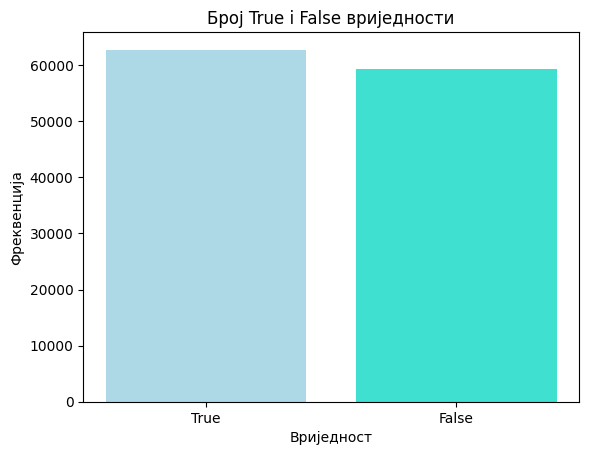

In [118]:
counts = df['majority_target'].value_counts()


plt.bar(counts.index.astype(str), counts.values, color=['lightblue', 'turquoise'])
plt.xlabel("Вриједност")
plt.ylabel("Фреквенција")
plt.title("Број True i False вриједности")
plt.show()

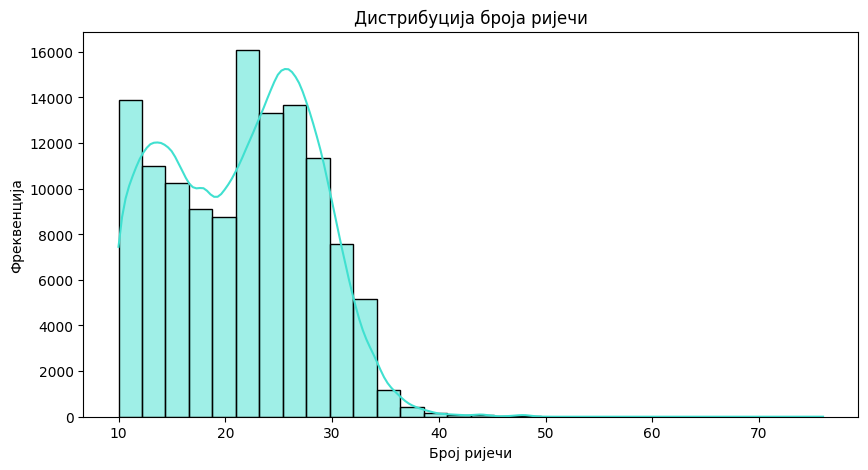

In [116]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Word count'], bins=30, kde=True, color='turquoise')

plt.xlabel("Број ријечи")
plt.ylabel("Фреквенција")
plt.title("Дистрибуција броја ријечи")

plt.show()

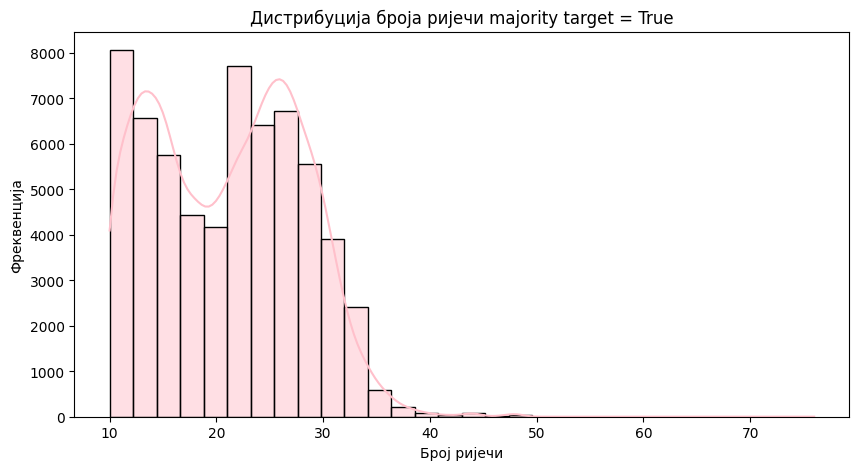

In [115]:
df_true = df[df['majority_target'] == True]  

plt.figure(figsize=(10, 5))
sns.histplot(df_true['Word count'], bins=30, kde=True, color='pink')

plt.xlabel("Број ријечи")
plt.ylabel("Фреквенција")
plt.title("Дистрибуција броја ријечи majority target = True")

# Prikaz grafika
plt.show()

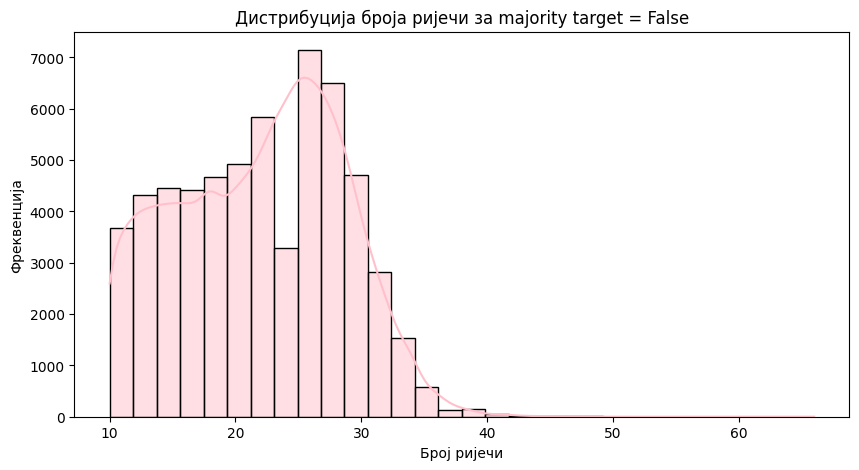

In [114]:
df_false = df[df['majority_target'] == False]  

plt.figure(figsize=(10, 5))
sns.histplot(df_false['Word count'], bins=30, kde=True, color='pink')

plt.xlabel("Број ријечи")
plt.ylabel("Фреквенција")
plt.title("Дистрибуција броја ријечи за majority target = False")

# Prikaz grafika
plt.show()